# Lineáris regresszió Python-ban



----


Regressziószámítással során véletlen változók között fennálló kapcsolatot modellezzük. A [lineáris regresszió](https://hu.wikipedia.org/wiki/Line%C3%A1ris_regresszi%C3%B) esetében feltételezzük, hogy a magyarázó- ($X$) és a magyarázott ($Y$) változók közti összefüggés lineáris:
$$y_i = c_0 + c_1x_{i1} + c_2x_{i2} + \dots + c_kx_{ik} + \epsilon_i$$

ahol $\epsilon_i$ egy meg nem figyelt véletlen változó, amely "zajjal" perturbálja a magyarázó és a magyarázott változók közötti lineáris kapcsolatot.


A lineáris regresszió becslése során, valamilyen optimumkeresési eljárás segítségével (pl. a [legkisebb négyzetek módszere](https://hu.wikipedia.org/wiki/Legkisebb_n%C3%A9gyzetek_m%C3%B3dszere)), megkeressük a $c_i$ paramétervektorokat, melyekkel minimalizálják a hibát a rendelkezésre álló mintákhoz képest.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Ábra 1. A lineáris regresszió alkalmazásánál, feltételezzük, hogy a rendelkezésre álló minták, megfigyelések (piros pontok), egy függő ($y$) és egy független változó ($x$) közötti lineáris viszonytól (kék vonal) való véletlenszerű kisebb eltérésekből (zöld vonalak) származnak. [Kép forrása](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Python-ban, a lineáris regresszió számítására a `scikit-learn` csomag [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modelljét [alkalmazhatjuk](https://realpython.com/linear-regression-in-python/).

## Példa

 

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


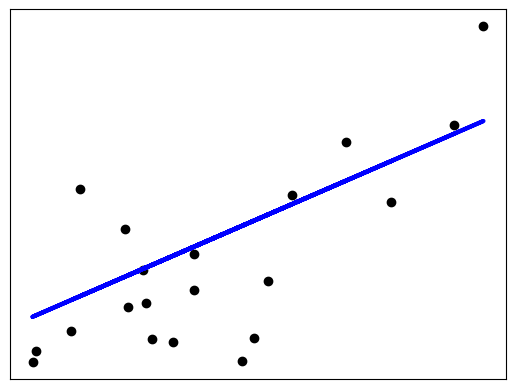

In [1]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Feladatok

1.	Illesszünk lineáris regresszió függvényt `sklearn.linear_model.LinearRegression` segítségével, a következő adatokra: 
```python
rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);
```

2.	Írassuk ki a regressziós egyenes hibáját (R négyzet érték) és a regressziós vonal lejtő-elfogását (*intercept*) és meredekségét (*slope*). 

3.	A `house_sales.csv` állomány házeladási tranzakciókat tartalmaz, feltüntetve a ház paramétereit (szobák, emeletek száma, terület, állapot, kilátás stb.) és az eladási árat. Vizualizáljuk a paraméterek eloszlását majd építsünk egy lineáris regresszió modellt, mely különböző paraméterekre, megbecsüli egy háznak az árát. Vizsgáljuk meg a modell pontosságát. 

4.	Teszteljük vizuálisan (ha valamilyen mintázat látszik a ploton, akkor valamilyen nemlineáris hatás is jelen van) a linearitást  a reziduálisok és regressziós paraméterek pontdiagramon való ábrázolásával. (A reziduális annak mértéke, hogy egy pont milyen távolságra van függőlegesen a regressziós egyenestől. Egyszerűen az előre jelzett érték és a megfigyelt tényleges érték közötti eltérést/hibát jelenti.)

5.	Ábrázoljuk a reziduálisok eloszlását hisztogram és [Q–Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0) segítségével.

1. Illesszünk lineáris regresszió függvényt sklearn.linear_model.LinearRegression segítségével, a következő adatokra:

Model slope:     1.9540226772876963
Model intercept: -4.78490384245325


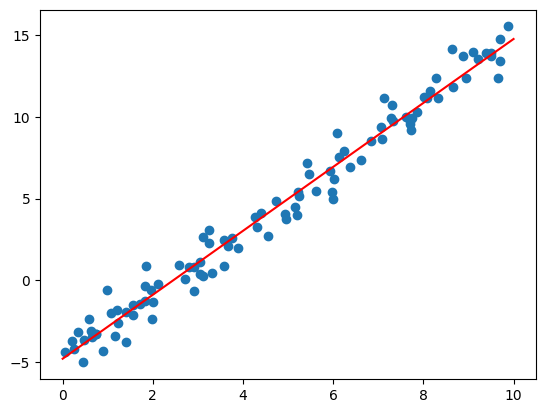

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
x = 10 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

print('Model slope:    ', model.coef_[0][0])
print('Model intercept:', model.intercept_[0])

xfit = np.linspace(0, 10, 1000)
Xfit = xfit.reshape(-1, 1)
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, '-r')
plt.show()


2. Írassuk ki a regressziós egyenes hibáját (R négyzet érték) és a regressziós vonal lejtő-elfogását (intercept) és meredekségét (slope).

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
x = 10 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

y_pred = model.predict(X)
r2 = r2_score(Y, y_pred)

print("Regresszios vonal lejto-elfogasa (intercept): {:.4f}".format(intercept))
print("Regresszios vonal meredeksege (slope): {:.4f}".format(slope))
print("R negyzet ertek: {:.4f}".format(r2))


Regresszios vonal lejto-elfogasa (intercept): -4.7849
Regresszios vonal meredeksege (slope): 1.9540
R negyzet ertek: 0.9765


3. A house_sales.csv állomány házeladási tranzakciókat tartalmaz, feltüntetve a ház paramétereit (szobák, emeletek száma, terület, állapot, kilátás stb.) és az eladási árat. Vizualizáljuk a paraméterek eloszlását majd építsünk egy lineáris regresszió modellt, mely különböző paraméterekre, megbecsüli egy háznak az árát. Vizsgáljuk meg a modell pontosságát.

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

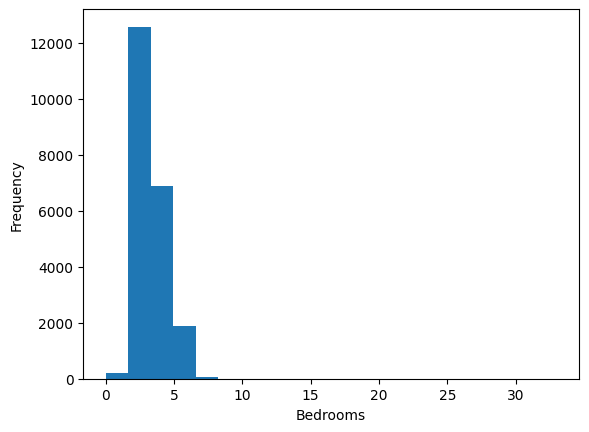

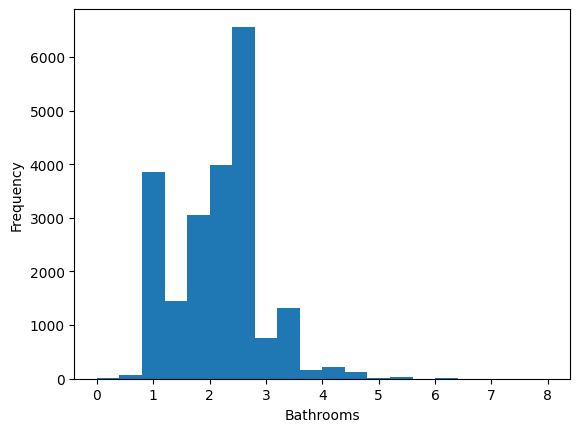

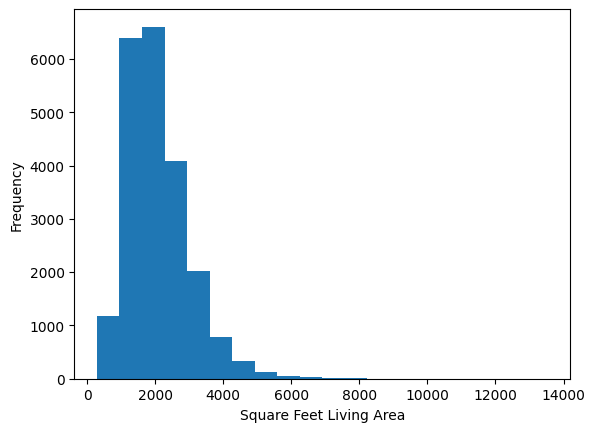

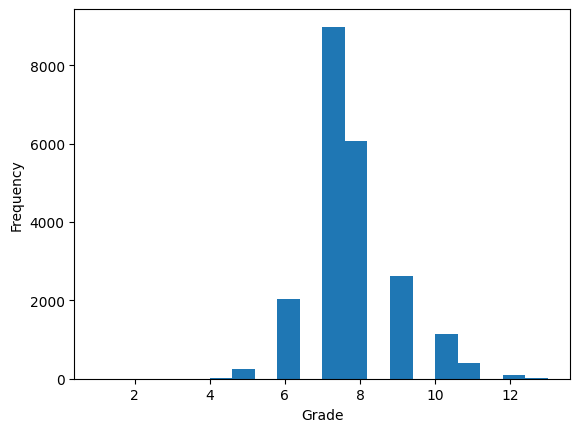

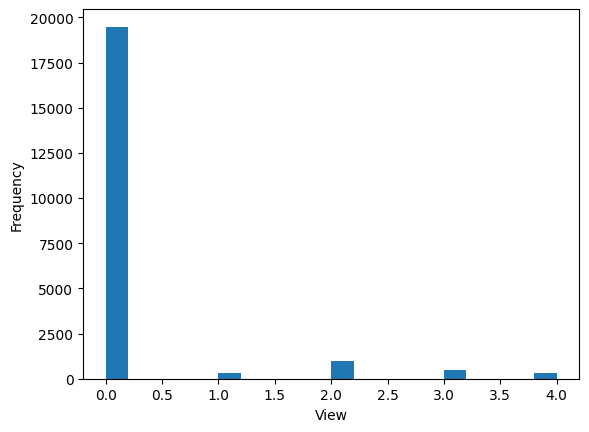

Model coefficients: [-30749.2871905  -21425.88460555    200.35426902  91737.24363199
  93638.23972692]
Model intercept: -452027.3268543921
Mean Squared Error: 56882643286.783455
R squared value: 0.5779472364509445


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/sample_data/house_sales.csv')
print(data.head())

plt.hist(data['bedrooms'], bins=20)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['bathrooms'], bins=20)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['sqft_living'], bins=20)
plt.xlabel('Square Feet Living Area')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['grade'], bins=20)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['view'], bins=20)
plt.xlabel('View')
plt.ylabel('Frequency')
plt.show()

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'view']]

Y = data['price']

model = LinearRegression()
model.fit(X, Y)

print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

y_pred = model.predict(X)

mse = mean_squared_error(Y, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(Y, y_pred)
print('R squared value:', r2)


4. Teszteljük vizuálisan (ha valamilyen mintázat látszik a ploton, akkor valamilyen nemlineáris hatás is jelen van) a linearitást a reziduálisok és regressziós paraméterek pontdiagramon való ábrázolásával. (A reziduális annak mértéke, hogy egy pont milyen távolságra van függőlegesen a regressziós egyenestől. Egyszerűen az előre jelzett érték és a megfigyelt tényleges érték közötti eltérést/hibát jelenti.)

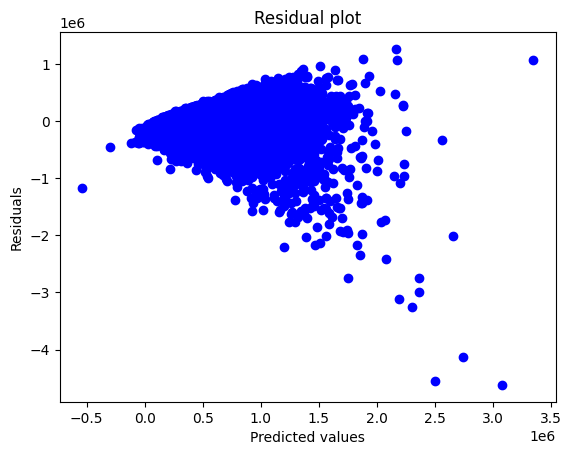

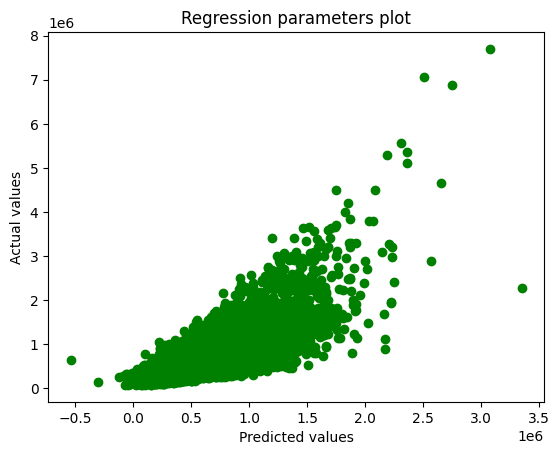

In [15]:
plt.scatter(model.predict(X), model.predict(X) - Y, color='blue')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

plt.scatter(model.predict(X), Y, color='green')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Regression parameters plot')
plt.show()


5. Ábrázoljuk a reziduálisok eloszlását hisztogram és Q–Q plot segítségével.

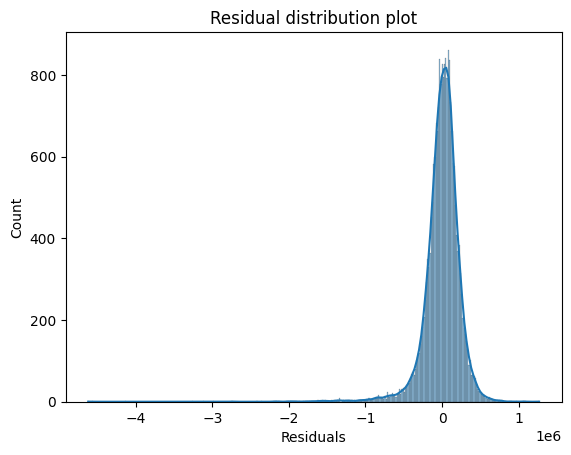

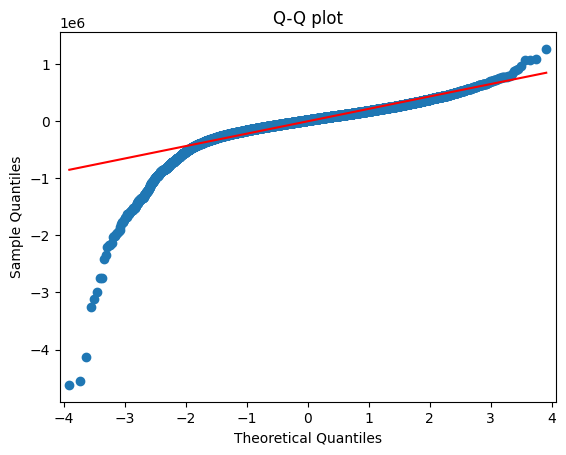

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.histplot(model.predict(X) - Y, kde=True)
plt.xlabel('Residuals')
plt.title('Residual distribution plot')
plt.show()

residuals = model.predict(X) - Y
fig = sm.qqplot(residuals, line='r')
plt.title('Q-Q plot')
plt.show()
